In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from flask import Flask, request, jsonify
from flask_cors import CORS

In [3]:
# Load the dataset
jobs_df = pd.read_csv('upwork-jobs.csv')

# Display the first few rows
jobs_df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,NaN,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [4]:
#Check the first and last few rows:


print(jobs_df.head())  # First 5 rows
print(jobs_df.tail())  # Last 5 rows


                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link  \
0  https://www.upwork.com/jobs/Experienced-Media-...   
1  https://www.upwork.com/jobs/Full-Stack-Develop...   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0...   

                                         description  \
0  We’re looking for a talented and hardworking a...   
1  Job Title: Full Stack DeveloperWe are seeking ...   
2  I need someone to redesign my bubble.io site t...   
3  Join Our Growing Team!We are an innovative com...   
4  We are looking for a resource who can work 

In [5]:
#Check the shape (number of rows and columns):
print(jobs_df.shape)


(53058, 9)


In [7]:
#Identify missing values:
print(jobs_df.isnull().sum())


title                 0
link                  0
description           0
published_date        0
is_hourly          8229
hourly_low        30102
hourly_high       30897
budget            31185
country            1141
dtype: int64


In [14]:
#Handle missing values:
jobs_df.dropna(inplace=True)  # Remove rows with missing values (if applicable)
# OR
jobs_df.ffill(inplace=True)  # Forward fill first
jobs_df.bfill(inplace=True)  # Then backward fill


In [16]:
#Find and remove duplicate rows:
print(jobs_df.duplicated().sum())  # Count duplicates
jobs_df.drop_duplicates(inplace=True)  # Remove duplicates


0


,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country


In [17]:
# Inspect column data types:

print(jobs_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           0 non-null      object 
 1   link            0 non-null      object 
 2   description     0 non-null      object 
 3   published_date  0 non-null      object 
 4   is_hourly       0 non-null      object 
 5   hourly_low      0 non-null      float64
 6   hourly_high     0 non-null      float64
 7   budget          0 non-null      float64
 8   country         0 non-null      object 
dtypes: float64(3), object(6)
memory usage: 0.0+ bytes
None


In [20]:
# Convert data types if necessary:

jobs_df['published_date'] = pd.to_datetime(jobs_df['published_date'])  # Convert date column
jobs_df['budget'] = jobs_df['budget'].astype(float)  # Convert salary to numeric

In [21]:
#Get an overview of numerical data:
print(jobs_df.describe())


      published_date  hourly_low  hourly_high  budget
count              0         0.0          0.0     0.0
mean             NaT         NaN          NaN     NaN
min              NaT         NaN          NaN     NaN
25%              NaT         NaN          NaN     NaN
50%              NaT         NaN          NaN     NaN
75%              NaT         NaN          NaN     NaN
max              NaT         NaN          NaN     NaN
std              NaN         NaN          NaN     NaN


In [22]:
# Get summary of categorical columns:

print(jobs_df.describe(include=['O']))  # 'O' means object (categorical) data

       title link description is_hourly country
count      0    0           0         0       0
unique     0    0           0         0       0
top      NaN  NaN         NaN       NaN     NaN
freq     NaN  NaN         NaN       NaN     NaN


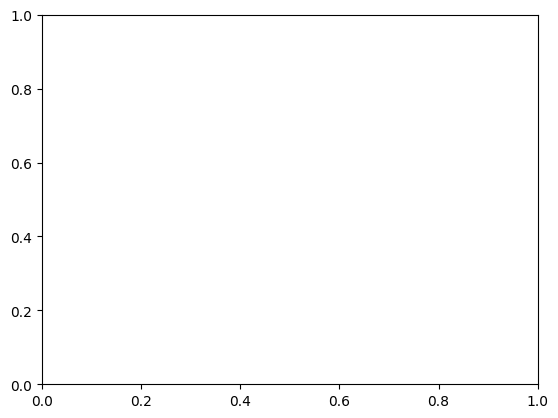

In [25]:
# Identify possible outliers using box plots:

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=jobs_df['budget'])
plt.show()

In [28]:
# Load the dataset
jobs_df = pd.read_csv('upwork-jobs.csv')

# Display the first few rows
jobs_df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,NaN,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


Preprocess the dataset:

    Clean the job descriptions and required skills.

    Handle missing values and normalize text.

In [29]:
# Drop rows with missing values
jobs_df.dropna(subset=['description', 'title'], inplace=True)

# Convert text to lowercase
jobs_df['description'] = jobs_df['description'].str.lower()
jobs_df['title'] = jobs_df['title'].str.lower()

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

jobs_df['description'] = jobs_df['description'].apply(remove_stopwords)
jobs_df['title'] = jobs_df['title'].apply(remove_stopwords)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Semek/nltk_data'
    - 'C:\\Users\\Semek\\PycharmProjects\\AI-Powered-Job-Recommendation-System\\.venv\\nltk_data'
    - 'C:\\Users\\Semek\\PycharmProjects\\AI-Powered-Job-Recommendation-System\\.venv\\share\\nltk_data'
    - 'C:\\Users\\Semek\\PycharmProjects\\AI-Powered-Job-Recommendation-System\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\Semek\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Feature Engineering

    Combine job descriptions and required skills into a single text feature:

In [ ]:
jobs_df['combined_text'] = jobs_df['description'] + ' ' + jobs_df['title']

In [ ]:
# Vectorize the combined text using TF-IDF:


tfidf = TfidfVectorizer(max_features=5000)
job_vectors = tfidf.fit_transform(jobs_df['combined_text'])